In [1]:
#%matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt
import yt
import h5py
from yt.data_objects.particle_filters import add_particle_filter
from yt.analysis_modules.halo_analysis.halo_catalog import HaloCatalog
from matplotlib.colors import LogNorm
from iminuit import Minuit, describe, Struct


In [2]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

In [3]:
fn = "/data/TMP-outputs/output_00041/info_00041.txt"
fn = "/data/ISAPP_gadget/snapshot_006"
#fn = "/home/arturo/works/Gadget-2.0.7/Gadget2/lcdm_gas/snapshot_005"
# load data
ds = yt.load(fn)
ad = ds.all_data()

yt : [INFO     ] 2017-07-13 17:52:37,786 Calculating time from 1.000e+00 to be 4.356e+17 seconds
yt : [INFO     ] 2017-07-13 17:52:37,787 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2017-07-13 17:52:37,817 Parameters: current_time              = 4.35581052821e+17 s
yt : [INFO     ] 2017-07-13 17:52:37,818 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-07-13 17:52:37,820 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-13 17:52:37,822 Parameters: domain_right_edge         = [ 25000.  25000.  25000.]
yt : [INFO     ] 2017-07-13 17:52:37,823 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-07-13 17:52:37,824 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-07-13 17:52:37,824 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2017-07-13 17:52:37,825 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2017-07-13 17:52:37,826 Parameters: hubble_constant           =

In [4]:
# finding halos
#hc = HaloCatalog(data_ds=ds, finder_method='fof')
#hc.create()


In [5]:
#p = yt.ParticlePlot(ds, ('max_res_dark_matter','particle_position_x'), ('max_res_dark_matter','particle_position_y'))
#p = yt.ParticlePlot(ds, 'particle_position_x','particle_position_y')
#p = yt.ProjectionPlot(ds,'z','density')
#p.annotate_halos(hc, annotate_field = 'particle_identifier', width=(10,'Mpc'), factor=2)

In [6]:
#hc.save_catalog()



In [7]:
fof = yt.load("halo_catalogs_G_fof/catalog/catalog.0.h5")
hop = yt.load("halo_catalogs_G_hop/catalog/catalog.0.h5")
roc = yt.load("Catalogs_rockstar_ISAPP/rockstar_halos/halos_0.0.bin")

yt : [INFO     ] 2017-07-13 17:52:44,052 Parameters: current_time              = 4.35581052821e+17
yt : [INFO     ] 2017-07-13 17:52:44,052 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-07-13 17:52:44,054 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-13 17:52:44,055 Parameters: domain_right_edge         = [  1.13879450e+26   1.13879450e+26   1.13879450e+26]
yt : [INFO     ] 2017-07-13 17:52:44,056 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-07-13 17:52:44,058 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-07-13 17:52:44,059 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2017-07-13 17:52:44,059 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2017-07-13 17:52:44,061 Parameters: hubble_constant           = 0.6774
yt : [INFO     ] 2017-07-13 17:52:44,095 Parameters: current_time              = 4.35581052821e+17
yt : [INFO     ] 2017-07-13 17:52:44,096 Parameters:

In [8]:
fof.field_list
hop.field_list
roc.field_list

yt : [INFO     ] 2017-07-13 17:52:46,251 Allocating for 7.334e+04 particles (index particle type 'all')
yt : [INFO     ] 2017-07-13 17:52:46,298 Identified 2.241e+04 octs
yt : [INFO     ] 2017-07-13 17:52:46,548 Allocating for 1.032e+04 particles (index particle type 'all')
yt : [INFO     ] 2017-07-13 17:52:46,556 Identified 3.201e+03 octs
yt : [INFO     ] 2017-07-13 17:52:46,768 Allocating for 2.764e+04 particles (index particle type 'all')
yt : [INFO     ] 2017-07-13 17:52:46,801 Identified 8.249e+03 octs


[('all', 'A2x'),
 ('all', 'A2y'),
 ('all', 'A2z'),
 ('all', 'Ax'),
 ('all', 'Ay'),
 ('all', 'Az'),
 ('all', 'Jx'),
 ('all', 'Jy'),
 ('all', 'Jz'),
 ('all', 'Voff'),
 ('all', 'Xoff'),
 ('all', 'alt_m1'),
 ('all', 'alt_m2'),
 ('all', 'alt_m3'),
 ('all', 'alt_m4'),
 ('all', 'b_to_a'),
 ('all', 'b_to_a2'),
 ('all', 'bullock_spin'),
 ('all', 'c_to_a'),
 ('all', 'c_to_a2'),
 ('all', 'child_r'),
 ('all', 'desc'),
 ('all', 'energy'),
 ('all', 'flags'),
 ('all', 'kin_to_pot'),
 ('all', 'klypin_rs'),
 ('all', 'm_pe_b'),
 ('all', 'm_pe_d'),
 ('all', 'mgrav'),
 ('all', 'min_bulkvel_err'),
 ('all', 'min_pos_err'),
 ('all', 'min_vel_err'),
 ('all', 'n_core'),
 ('all', 'num_child_particles'),
 ('all', 'num_p'),
 ('all', 'p_start'),
 ('all', 'particle_bulkvel_x'),
 ('all', 'particle_bulkvel_y'),
 ('all', 'particle_bulkvel_z'),
 ('all', 'particle_corevel_x'),
 ('all', 'particle_corevel_y'),
 ('all', 'particle_corevel_z'),
 ('all', 'particle_identifier'),
 ('all', 'particle_mass'),
 ('all', 'particle_po

In [9]:
par_x = np.array(ad['particle_position_x'].in_units('pc'),dtype=np.float64)
par_y = np.array(ad['particle_position_y'].in_units('pc'),dtype=np.float64)
par_z = np.array(ad['particle_position_z'].in_units('pc'),dtype=np.float64)
par_mass = np.array(ad['particle_mass'].in_units('Msun'),dtype=np.float64)

yt : [INFO     ] 2017-07-13 17:52:52,660 Allocating for 1.678e+07 particles (index particle type 'all')
yt : [INFO     ] 2017-07-13 17:52:55,120 Identified 1.251e+06 octs


In [10]:
bin_num = 150
xedges = np.linspace(par_x.min(),par_x.max(),bin_num)
yedges = np.linspace(par_y.min(),par_y.max(),bin_num)
lim = 2e6
low_lim, up_lim = 3e7,4e7

par_con = (par_z>low_lim)&(par_z<up_lim)

# Sort out Particles
H, xedges, yedges = np.histogram2d(par_x[par_con], par_y[par_con], bins=(xedges, yedges),weights=par_mass[par_con])
H = H.T

# data from halos
hop_data = hop.all_data()
fof_data = fof.all_data()
roc_data = roc.all_data()
# defining halos array
### HOP ###
halos_x_hop = np.array(hop_data['halos', u'particle_position_x'].in_units('pc'),dtype=np.float64)
halos_y_hop = np.array(hop_data['halos', u'particle_position_y'].in_units('pc'),dtype=np.float64)
halos_z_hop = np.array(hop_data['halos', u'particle_position_z'].in_units('pc'),dtype=np.float64)
halos_r_hop = np.array(hop_data['halos', u'virial_radius'].in_units('pc'),dtype=np.float64)
halos_mass_hop = np.array(hop_data['halos', u'particle_mass'].in_units('Msun'),dtype=np.float64)
# Sort out all halos which are more near than 2r than the box boundary
# generically find out box size
a = np.array([par_x, par_y, par_z]).max()
# indices of halos in the box
hop_cond = np.where( ((a-2*halos_r_hop) > halos_x_hop) & ((2*halos_r_hop) < halos_x_hop) & \
                       ((a-2*halos_r_hop) > halos_y_hop) & ((2*halos_r_hop) < halos_y_hop) & \
                       ((a-2*halos_r_hop) > halos_z_hop) & ((2*halos_r_hop) < halos_z_hop))
# sort out
halos_x_hop    = halos_x_hop[hop_cond]
halos_y_hop    = halos_y_hop[hop_cond]
halos_z_hop    = halos_z_hop[hop_cond]
halos_r_hop    = halos_r_hop[hop_cond]
halos_mass_hop = halos_mass_hop[hop_cond]

### FOF ###
halos_x_fof = np.array(fof_data['halos', u'particle_position_x'].in_units('pc'),dtype=np.float64)
halos_y_fof = np.array(fof_data['halos', u'particle_position_y'].in_units('pc'),dtype=np.float64)
halos_z_fof = np.array(fof_data['halos', u'particle_position_z'].in_units('pc'),dtype=np.float64)
halos_r_fof = np.array(fof_data['halos', u'virial_radius'].in_units('pc'),dtype=np.float64)
halos_mass_fof = np.array(fof_data['halos', u'particle_mass'].in_units('Msun'),dtype=np.float64)
# Sort out all halos which are more near than 2r than the box boundary
# generically find out box size
a = np.array([par_x, par_y, par_z]).max()
# indices of halos in the box
fof_cond = np.where( ((a-2*halos_r_fof) > halos_x_fof) & ((2*halos_r_fof) < halos_x_fof) & \
                       ((a-2*halos_r_fof) > halos_y_fof) & ((2*halos_r_fof) < halos_y_fof) & \
                       ((a-2*halos_r_fof) > halos_z_fof) & ((2*halos_r_fof) < halos_z_fof))
# sort out
halos_x_fof    = halos_x_fof[fof_cond]
halos_y_fof    = halos_y_fof[fof_cond]
halos_z_fof    = halos_z_fof[fof_cond]
halos_r_fof    = halos_r_fof[fof_cond]
halos_mass_fof = halos_mass_fof[fof_cond]

### Rockstar ###
halos_x_roc = np.array(roc_data['halos', u'particle_position_x'].in_units('pc'),dtype=np.float64)
halos_y_roc = np.array(roc_data['halos', u'particle_position_y'].in_units('pc'),dtype=np.float64)
halos_z_roc = np.array(roc_data['halos', u'particle_position_z'].in_units('pc'),dtype=np.float64)
halos_r_roc = np.array(roc_data['halos', u'virial_radius'].in_units('pc'),dtype=np.float64)
halos_mass_roc = np.array(roc_data['halos', u'particle_mass'].in_units('Msun'),dtype=np.float64)
# Sort out all halos which are more near than 2r than the box boundary
# generically find out box size
a = np.array([par_x, par_y, par_z]).max()
# indices of halos in the box
roc_cond = np.where( ((a-2*halos_r_roc) > halos_x_roc) & ((2*halos_r_roc) < halos_x_roc) & \
                       ((a-2*halos_r_roc) > halos_y_roc) & ((2*halos_r_roc) < halos_y_roc) & \
                       ((a-2*halos_r_roc) > halos_z_roc) & ((2*halos_r_roc) < halos_z_roc))
# sort out
halos_x_roc    = halos_x_roc[roc_cond]
halos_y_roc    = halos_y_roc[roc_cond]
halos_z_roc    = halos_z_roc[roc_cond]
halos_r_roc    = halos_r_roc[roc_cond]
halos_mass_roc = halos_mass_roc[roc_cond]


In [11]:
# A slice
### HOP ###
hop_con = np.where((halos_z_hop>low_lim)&(halos_z_hop<up_lim))
halos_x_hop_f = halos_x_hop[hop_con]
halos_y_hop_f = halos_y_hop[hop_con]
halos_r_hop_f = halos_r_hop[hop_con]
### FOF ###
fof_con = np.where((halos_z_fof>low_lim)&(halos_z_fof<up_lim))
halos_x_fof_f = halos_x_fof[fof_con]
halos_y_fof_f = halos_y_fof[fof_con]
halos_r_fof_f = halos_r_fof[fof_con]
### RockStar ###
roc_con = np.where((halos_z_roc>low_lim)&(halos_z_roc<up_lim))
halos_x_roc_f = halos_x_roc[roc_con]
halos_y_roc_f = halos_y_roc[roc_con]
halos_r_roc_f = halos_r_roc[roc_con]

<IPython.core.display.Javascript object>


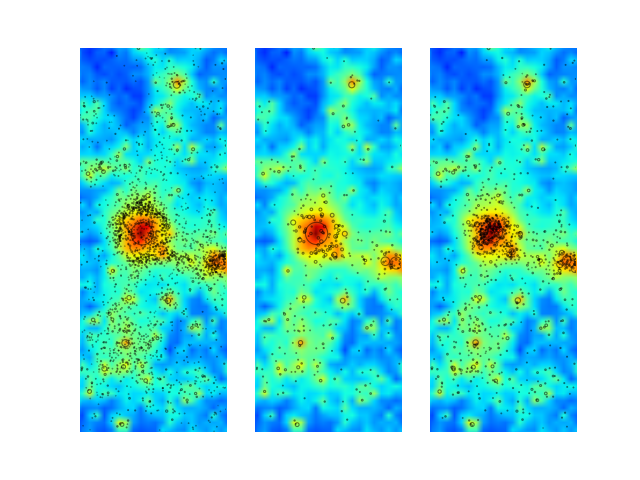

In [15]:
#fig,[ax,ax1,ax2] = plt.subplots(1,3,figsize=[18,6],sharex=ax1)
ax = plt.subplot(1,3,1)
ax1 = plt.subplot(1,3,2, sharex=ax,sharey=ax)
ax2 = plt.subplot(1,3,3, sharex=ax,sharey=ax)

ax.set_xlim([0,3.5e7])
ax.set_ylim([0,3.5e7])
ax1.set_xlim([0,3.5e7])
ax1.set_ylim([0,3.5e7])
ax2.set_xlim([0,3.5e7])
ax2.set_ylim([0,3.5e7])

ax.imshow(H, interpolation='bilinear', origin='low',
         extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          norm=LogNorm(vmin=H.min(), vmax=H.max()))
ax1.imshow(H, interpolation='bilinear', origin='low',
         extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          norm=LogNorm(vmin=H.min(), vmax=H.max()))
ax2.imshow(H, interpolation='bilinear', origin='low',
         extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          norm=LogNorm(vmin=H.min(), vmax=H.max()))
ax1.scatter(halos_x_hop_f,halos_y_hop_f,s=400*(halos_r_hop_f/halos_r_hop_f.max())**2,
           facecolors='none',lw=1,alpha=0.5)
ax.scatter(halos_x_fof_f,halos_y_fof_f,s=400*(halos_r_fof_f/halos_r_fof_f.max())**2,
           facecolors='none',lw=1,alpha=0.5)
ax2.scatter(halos_x_roc_f,halos_y_roc_f,s=400*(halos_r_roc_f/halos_r_roc_f.max())**2,
           facecolors='none',lw=1,alpha=0.5)
ax.axis('off')
ax1.axis('off')
ax2.axis('off')
plt.savefig('slices_FOFHOPROCK.png',dpi=300)
#ax.scatter(halos_x,halos_y,marker='o', color='white')

In [14]:
print np.where(halos_r>=0.3*halos_r.max()), np.where(halos_mass>=0.7*halos_mass.max())

NameError: name 'halos_r' is not defined

In [72]:
# Select a halo
i = 9922
print halos_x[i]

# Shift coordinates to halo center
x, y, z = np.copy(par_x),np.copy(par_y),np.copy(par_z)
print x
x, y, z = np.subtract(x,halos_x[i]), np.subtract(y, halos_y[i]),np.subtract(z, halos_z[i])
print x

# Calculate radii of particles and sort out all particles outside of halo radius
r = np.sqrt(x**2 + y**2 + z**2)
in_x, in_y, in_z, in_mass = x[(r<halos_r[i])], y[(r<halos_r[i])], z[(r<halos_r[i])], par_mass[(r<halos_r[i])] 
in_r = r[(r<halos_r[i])]#np.sqrt(in_x**2 + in_y**2 + in_z**2)

23233217.2558
[  83034.25183224   38781.78412069  248291.83104892 ...,  202758.76203187
  264854.69019585  158703.47993016]
[-23150183.00394749 -23194435.47165904 -22984925.42473081 ...,
 -23030458.49374786 -22968362.56558388 -23074513.77584958]


In [67]:
# Calculate the densitiy profile
R = np.logspace(np.log10(in_r.min()),np.log10(in_r.max()),50)
hist, bins = np.histogram(in_r,bins=R,weights=in_mass)
n,_ = np.histogram(in_r,bins=R)
n = n[1:]
volume = 4 * np.pi * (bins[2:]**3-bins[1:-1]**3) /3
rho = hist[1:] / volume

bins = bins[(rho>0)]
n = n[rho>0]
rho = rho[[(rho>0)]]
print len(bins), len(rho),len(n)

47 47 47


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 50 but corresponding boolean dimension is 48


In [68]:
# calculating Power radius (arXiv:astro-ph/0201544)
Pcrit = 158.114774626 / 1e9 # Msun / kpc^3
Mdm = par_mass[0]

# sorting r
myradiuses = in_r[np.argsort(in_r)]
tabN = np.cumsum(np.ones(len(myradiuses)))[1:]
myradiuses = myradiuses[1:]
Rp03 = np.sqrt(200/64.) * np.sqrt(4 * np.pi * Pcrit * tabN / 3. / Mdm ) * (myradiuses**1.5)/ np.log(tabN) 
val =0.6
R_P03 = myradiuses[ np.where(Rp03 > val) ][0]
print R_P03


13526.0680518


In [69]:
def abg_profile(x,po,r_s,al,be,ga):
    power =  (be - ga) / al
    denominator = ((x/r_s)**ga) * ((1 + (x / r_s)**al)**power)
    return (10**po) / denominator

<IPython.core.display.Javascript object>


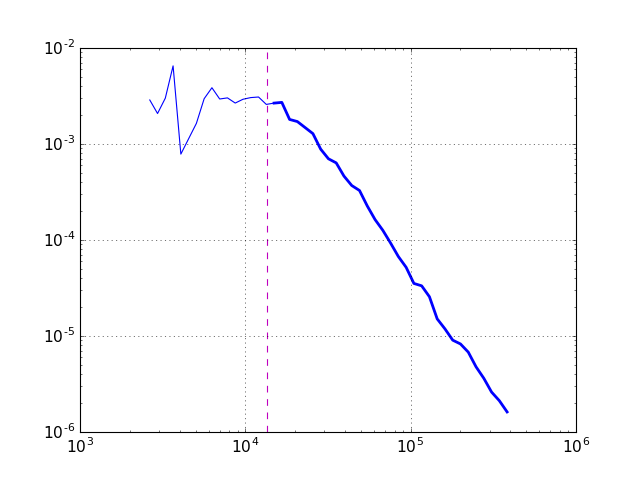

In [70]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([1e3,1e7])
#ax.set_ylim([1e27,1e32])

R=bins
#ax.axvline(x=epsilon,c='k',ls='--')
ax.axvline(x=R_P03,c='m',ls='--')
ax.plot(bins,rho)
ax.plot(bins[(bins>R_P03)],rho[(bins>R_P03)],lw=2.5,c='b')
y = np.array([1e29 for i in in_r])
plt.grid()

In [25]:
def chi2(po,r_s,al,be,ga):
    expected = abg_profile(bins,po,r_s,al,be,ga)
    observed = rho#[(bins>R_P03)]
    c = (np.log10((observed))- np.log10(expected))**2 #/ np.log10(n)#[(bins>R_P03)])
    #c = (observed- expected)**2 / (n[(bins>R_P03)])
    return np.nansum(c)



In [73]:
m = Minuit(chi2, 
         po=np.log10(rho[(bins>R_P03)].max()), error_po=0.01,     limit_po=(-30.,30.),
         r_s=0.03*halos_r[i],    error_r_s=0.1,     limit_r_s=(0.,1e9),
         al=3.,     error_al=0.1,    limit_al=(0,10),
         be=3,  error_be=0.1,   limit_be=(0,10),
         ga=0,  error_ga=0.1,   limit_ga=(0,10),
         print_level=0)
m.migrad();
m.values

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: InitialParamWarning: errordef is not given. Default to 1.


{'al': 5.951465000745786,
 'be': 2.504674052680081,
 'ga': 1.0888177970347357e-07,
 'po': -2.5893689678509055,
 'r_s': 19925.665589726195}

In [74]:
print halos_r[i], halos_mass[i]

475644.769338 2.12089208974e+12


<IPython.core.display.Javascript object>


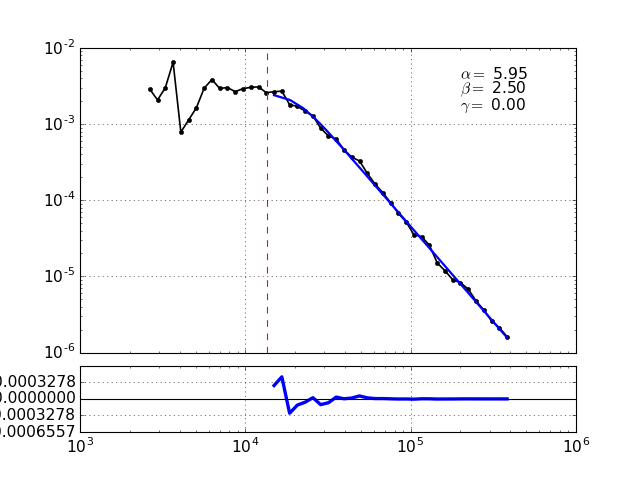

19925.6655897 -2.58936896785
0.000437118879762


In [59]:
fig = plt.figure()
ax = plt.subplot2grid((5,1), (0, 0),rowspan=4)
ax1 = plt.subplot2grid((5,1), (4, 0),rowspan=1,sharex=ax)
#fig.subplots_adjust(hspace='0.5em')
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax.set_xscale('log')
ax.set_yscale('log')

# 
r_false = np.linspace(bins[(bins>R_P03)].min(),bins[(bins>R_P03)].max(),100)
#ax.plot(r_false,abg_profile(r_false,-2,4e4,1,3,0.1))

ax.plot(bins,rho,'k-o',ms=3.8,lw=1.5)
texto = r"$\alpha = $ {0:.2f}".format(m.values['al'])
texto1 = r"$\beta = $ {0:.2f}".format(m.values['be'])
texto2 = r"$\gamma = $ {0:.2f}".format(m.values['ga'])
print m.values['r_s'],m.values['po']
ax.text(m.values['r_s']*10,(10**m.values['po'])*1.5,texto)
ax.text(m.values['r_s']*10,(10**m.values['po']),texto1)
ax.text(m.values['r_s']*10,(10**m.values['po'])*0.6,texto2)
ax.plot(r_false,abg_profile(r_false,m.values['po'],m.values['r_s'],m.values['al'],m.values['be'],m.values['ga']),lw=2)
ax.axvline(x=R_P03,c='m',ls='--')
ax.grid()
#ax.plot(r_false,abg_profile(r_false,29,1e6,1,3,1))


#ax1.plot(bins,abg_profile(bins,m.values['po'],m.values['r_s'],m.values['al'],m.values['be'],m.values['ga']) - rho )
residuals = - abg_profile(bins[(bins>R_P03)],m.values['po'],m.values['r_s'],m.values['al'],m.values['be'],m.values['ga']) + rho[(bins>R_P03)]
limito = np.abs(residuals).max()
print limito
ax1.plot(bins[(bins>R_P03)],residuals,lw=3,c='b')
ax1.axhline(y=0,c='k',ls='-')
ax1.set_ylim([-limito*1.5,limito*1.5])
ax1.grid()
ax1.yaxis.set_ticks(np.arange(-limito*1.5,limito*1.5,limito*0.75))

In [60]:
def fit_data(bins, rho, R_P03, NFW=False):
    def abg_profile(x,po,r_s,al,be,ga):
        power =  (be - ga) / al
        denominator = ((x/r_s)**ga) * ((1 + (x / r_s)**al)**power)
        return (10**po) / denominator
    def chi2(po,r_s,al,be,ga):
        expected = abg_profile(bins[(bins>R_P03)],po,r_s,al,be,ga)
        observed = rho[(bins>R_P03)]
        c = (np.log10((observed))- np.log10(expected))**2 #/ np.log10(n)#[(bins>R_P03)])
        #c = (observed- expected)**2 / (n[(bins>R_P03)])
        return np.nansum(c)
    a_lim, a_lim2 =0,10.1
    b_lim, b_lim2 =0,10.1
    if (NFW):
        a_lim, a_lim2 =0.9,1.1
        b_lim, b_lim2 =2.9,3.1
        
    m = Minuit(chi2, 
         po=np.log10(rho[(bins>R_P03)].max()), error_po=0.01,     limit_po=(-30.,30.),
         r_s=0.03*halos_r[i],    error_r_s=0.1,     limit_r_s=(0.,1e9),
         al=1.,     error_al=0.1,    limit_al=(a_lim,a_lim2),
         be=3,  error_be=0.1,   limit_be=(b_lim,b_lim2),
         ga=1.,  error_ga=0.1,   limit_ga=(a_lim,a_lim2),
         print_level=0)
    m.migrad();
    return m.values
    

In [63]:
def get_data(i):
    print halos_r[i], i
    # Shift coordinates to halo center
    x, y, z = np.copy(par_x),np.copy(par_y),np.copy(par_z)
    x, y, z = np.subtract(x,halos_x[i]), np.subtract(y, halos_y[i]),np.subtract(z, halos_z[i])

    # Calculate radii of particles and sort out all particles outside of halo radius
    r = np.sqrt(x**2 + y**2 + z**2)
    in_x, in_y, in_z, in_mass = x[(r<halos_r[i])], y[(r<halos_r[i])], z[(r<halos_r[i])], par_mass[(r<halos_r[i])] 
    in_r = r[(r<halos_r[i])]#np.sqrt(in_x**2 + in_y**2 + in_z**2)
    
    # Calculate the densitiy profile
    R = np.logspace(np.log10(in_r.min()),np.log10(in_r.max()),50)
    hist, bins = np.histogram(in_r,bins=R,weights=in_mass)
    n,_ = np.histogram(in_r,bins=R)
    n = n[1:]
    volume = 4 * np.pi * (bins[2:]**3-bins[1:-1]**3) /3
    rho = hist[1:] / volume

    bins = bins[(rho>0)]
    n = n[rho>0]
    rho = rho[[(rho>0)]]
    
    # calculating Power radius (arXiv:astro-ph/0201544)
    Pcrit = 158.114774626 / 1e9 # Msun / kpc^3
    Mdm = par_mass[0]

    # sorting r
    myradiuses = in_r[np.argsort(in_r)]
    tabN = np.cumsum(np.ones(len(myradiuses)))[1:]
    myradiuses = myradiuses[1:]
    Rp03 = np.sqrt(200/64.) * np.sqrt(4 * np.pi * Pcrit * tabN / 3. / Mdm ) * (myradiuses**1.5)/ np.log(tabN) 
    val =0.6
    R_P03 = myradiuses[ np.where(Rp03 > val) ][0]
    #print R_P03
    
    return bins, rho, R_P03

In [64]:
def plot_halo_data(bins, rho, R_P03, ax):  
    print "coco2"
    #ax.axvline(x=R_P03,c='m',ls='--')
    ax.plot(bins[(bins<=R_P03)],rho[(bins<=R_P03)], alpha=0.3,c='gray')
    ax.plot(bins[(bins>R_P03)],rho[(bins>R_P03)],lw=1.5,c='b',alpha=0.5)

<IPython.core.display.Javascript object>


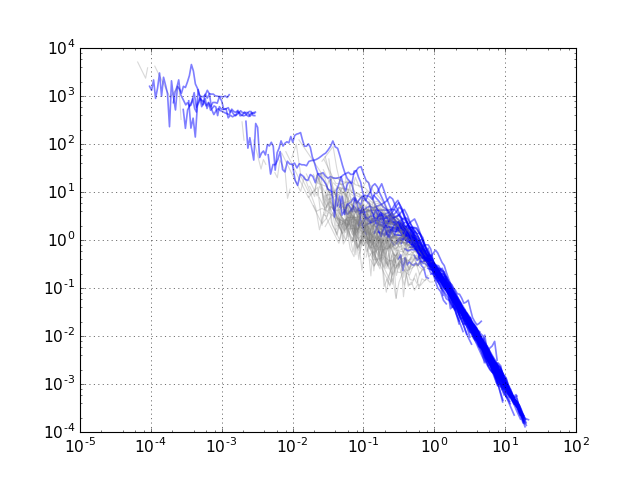

1334248.52546 9967


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 50 but corresponding boolean dimension is 48
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
1207619.05117 9963


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
994296.239101 9958


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
867919.428191 9962


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
852683.846989 9964


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
836839.188951 9966


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
831649.791747 9965


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
762393.246174 9961


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
734650.504419 9956


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
729607.153652 9960


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
728697.088971 9954


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
724952.805164 9957


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
724790.847127 9947


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
716233.140876 9952


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
670410.794622 9953


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
669179.370119 9951


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
659508.44988 9959


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
644493.001802 9938


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
595875.619208 9935


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
587055.202061 9955


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
585124.609077 9950


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
569283.9997 9942


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
559248.680926 9937


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
554667.090421 9941


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
553851.415391 9944


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
535706.626038 9936


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
526669.03425 9946


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
523899.289455 9943


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
512143.529113 9903


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
512058.419205 9911


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
500388.21055 9923


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
500374.682608 9934


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
487216.392564 9948


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
483112.556509 9932


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
481623.387951 9940


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
475644.769338 9922


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
475627.617548 9926


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
472417.003123 9945


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
466432.070742 9949


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
462260.687965 9929


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
460472.020846 9918


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
455906.072804 9909


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
453324.770274 9921


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
448734.011268 9931


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
446874.348689 9928


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
441105.028927 9897


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
438717.001431 9939


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
438083.128081 9906


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
435502.933184 9925


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
431963.033563 9919


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
426227.297612 9930


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
424232.032207 9933


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
423297.33296 9913


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
408861.985435 9924


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
407478.277471 9880


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
403666.613399 9908


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
403338.554632 9862


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
393055.561915 9904


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
391851.308579 9905


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
390641.998168 9916


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
387278.822468 9891


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
379891.732776 9385


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
379557.053111 9927


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
370188.989408 9910


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
366687.206086 9896


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
363505.476005 9893


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
363425.381546 9895


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
363203.646535 9888


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
357964.808519 9708


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
357779.228658 9843


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
357161.534612 9818


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
354282.583573 9899


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
354106.889997 9912


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
352523.669618 8908


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
352100.38726 9825


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
346905.228542 9885


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
343522.023548 9920


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
341473.158896 9915


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
338762.771708 9914


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
338544.039521 9889


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
335514.869187 9837


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
335399.030407 9878


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
334652.158416 9900


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
333793.246983 9861


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
329906.090253 9856


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
329745.841601 9875


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
329170.02747 9917


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
325782.981255 9619


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
325396.242955 9867


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
325115.980307 9206


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
324972.868306 9859


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
323793.2284 9886


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
321215.423961 8785


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
320456.392061 9868


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
317072.901914 9887


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
316913.248497 9879


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
316820.245524 9876


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
316237.238622 9898


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
315870.694878 9892


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


coco2
311441.118591 9848
coco2


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: InitialParamWarning: errordef is not given. Default to 1.


In [65]:
fig, ax1 = plt.subplots()
ax1.set_xscale('log')
ax1.set_yscale('log')

for i in (np.argsort(halos_r)[::-1])[0:100]:
    bins, rho, R_P03  = get_data(i)
    mvals = fit_data(bins, rho, R_P03, NFW=True)
    # Rescale rho and bins
    bins /= mvals['r_s']
    R_P03 /= mvals['r_s']
    rho /= 10**mvals['po']
    plot_halo_data(bins, rho, R_P03, ax1)
    
ax1.grid()

# General story

In [6]:
bins = np.logspace(np.log10(halos_mass.min()),np.log10(halos_mass.max()),30)
hist, bins = np.histogram(halos_mass,bins=bins)
width = bins[1:]-bins[:-1]
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

ax.bar(bins[1:],hist/par_mas[0],width=width)

NameError: name 'halos_mass' is not defined